# <font color="blue">Submitted by: Kaspar Kadalipp </font>
# HW6. Succinct trees

### <font color='orange'> Less important code is placed here</font>
### <font color='orange'> Report is below </font>

In [1]:
import matplotlib.pyplot as plt

In [2]:
def ex1():
    def catalan(n):
        result = 1.0
        for i in range(1, n):
            result = result * (i+n+1) / i
        return result / n

    def distinct_trees(n):
        return 2**(2 * n)

    x = [i*10 for i in range(1, 25)]
    catalan_y = [catalan(n) for n in x]
    distinct_trees_y = [distinct_trees(n) for n in x]

    plt.subplots(figsize=(10, 10))
    plt.plot(x, catalan_y, label=f"Catalan numbers count", linewidth=4)
    plt.plot(x, distinct_trees_y, label="$2^{2n}$", linewidth=4)
    plt.grid()
    plt.yscale('log')
    plt.legend(prop={'size': 14})
    plt.title('Number of Different Trees', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.show()


    plt.subplots(figsize=(10, 10))
    plt.plot(x, [y2 / y1 for y1, y2 in zip(catalan_y, distinct_trees_y )], label="$2^{2n}$ divided by Catalan Numbers", linewidth=4)
    plt.grid()
    plt.legend(prop={'size': 14})
    plt.title('Growth Rate of $2^{2n}$ vs Catalan Numbers', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('y (relative growth)', fontsize=16)
    plt.show()

# EX1

#####  In the lectures, we tried to establish what is the information-theoretic bound in the smallest number of bits needed to represent binary trees. Slides claimed that there are up to $2^{2n}$ distinct trees of n nodes, but we also showed that Catalan numbers count the number of different trees. Compare the growth rate of Catalan numbers vs $2^{2n}$. Plot the numbers (use logarithmic axes to fit larger values on plots). Are they in Theta() relationship (exactly the same growth rate)?

Used x values: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240].

I plotted number of trees from both functions using logarithmic y scale. This plot seemingly shows $\Theta$ relationship between these functions. However, when comparing the growth rates relative to each other it becomes clear that they don't grow at the same rate ($2^{2n}$ grows faster than Catalan numbers). Therefore, they can't be in a $\Theta$ relationship.

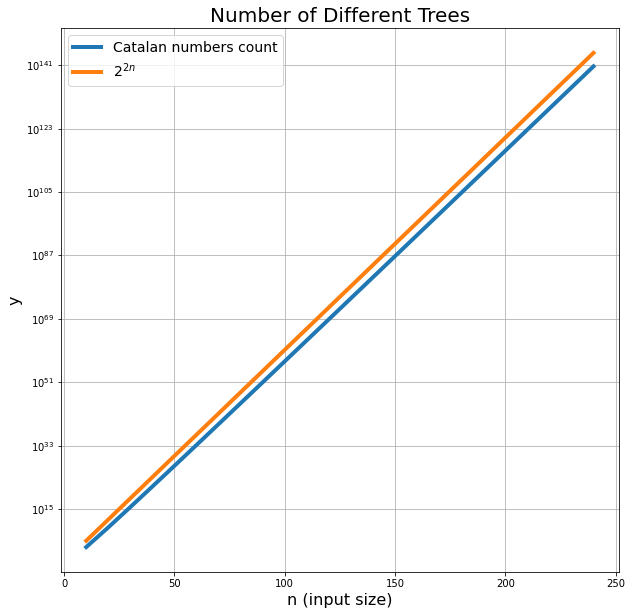

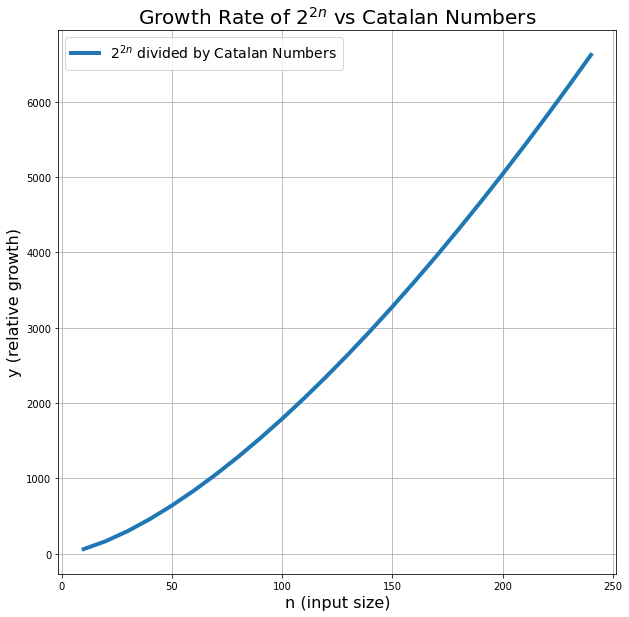

In [3]:
ex1()

# EX2

##### A binomial tree (not a binary heap!) of degree 4 (or any degree) has a very specific structure. If you would need an implicit structure to represent it, there is exactly one such tree. Draw a binomial tree of degree 4 and number the nodes in the following ways (for this one, it might be a good idea to start numbering from 0 / 0000):

##### Post-order
##### Pre-order
##### Level-order (label nodes level-by-level)

##### Hint: Post-order is on lecture slides (Heaps, Page 16, Figure 20.4)

##### Represent the tree as arrays, where the array index represents the number you gave to the node. Now take post-order node nr 11 (binary 1011, check heaps slides, same as before) as a reference node. Try to give indexing formulas to access the reference points parents and children for each representation (e.g. for normal heaps and its array structure the accessing was parent=i//2, child=i*2 (+1)). You can also try to use the number of combinations in your formulas e.g. 4 choose 2 (C(4,2)) or look at bit representations of your numbers (e.g. 1111 = 15) to see if you see some patterns.

##### For the following exercises, make sure to also shortly describe, what is the procedure to create the succinct representation and how to find the parent and children nodes.

To create array representation of the tree I traverse the tree in level-order adding element to the end of the array at every step.

# Post-order
![Post-order](https://i.imgur.com/islGppz.png)
# Pre-order
![Pre-order](https://i.imgur.com/gj7cTYW.png)
# Level-order
![Level-order](https://i.imgur.com/NHX1bM5.png)

# EX3

##### Represent the same tree in a Level-order unary degree sequence (check slides). Show how you perform operations of finding parent, i-th child. In order to do that, you might want to describe rank and select operations first.

![Unary_1](https://i.imgur.com/JDg2ZBB.png)
![Unary_2](https://i.imgur.com/lWsOfZ4.png)

# EX4

##### Represent the same tree, this time using Parenthesis representation. Show how to perform operations of finding parent, first child, next sibling.
##### Represent the same tree, this time using Depth-first unary degree sequence (DFUDS) representation. Show how to find parent, first child, next sibling.
##### Argue, which presentation feels the most natural for you.

Parenthesis representation feels much more natural. If I were to show these two array representations to a person who doesn’t know much about computer science I’m sure he would easily figure out which nodes are enclosed by which nodes with parenthesis representation. Parenthesis representation is what most people should be familiar with as they have used it in mathematics classes. DFUDS is less intuitive. For example, it’s difficult to tell how many children node 4 has - node 4 opening bracket is at index 4 and closing bracket at index 31, there's lots happening in between but node actually has 0 children. Compared to parenthesis representations where node 4 opening and closing brackets would be next to each other.

# Parenthesis representation
![Parenthesis representation](https://i.imgur.com/iJwKwL0.png)
# Depth-first unary degree sequence (DFUDS) representation
![DFUDS](https://i.imgur.com/IVJZNFv.png)

# EX5

##### Describe two further operations - subtree size and the lowest common ancestor of two nodes using one of the above representations (Parenthesis, DFUDS). Why do you need such operations?

Lowest common ancestor can be used to calculate distance between two nodes. Distance = distance from node1 to ancestor + distance from node2 to ancestor = distance from node1 to root + distance from node2 to root - 2 * distance from the lowest common ancestor to root.

Knowing the size of subtree shows how large of a dataset I have to work with. Size can be used to check whether tree is balanced or if a node is a leaf node (size is 1).

##### Briefly describe in your own words, why do we care about succinct data structures at all? What is the potential trade-off in using less memory? i.e. what do we gain and what do we lose?

Succinct data structures allow to store the data structure in a near minimal memory space while still allowing efficient query operations.
It’s a lossless data structure, so it can be used to reconstruct the original data structure.
Downside is that the operations that change the tree structure (delete, insert, merge) take much longer.

![EX5](https://i.imgur.com/96xhKfL.png)

# EX6

##### Consider the van Emde Boas tree (lecture about Heaps) implementation for 64-bit integers. How large would be only the data structure in bits (only structure, without data) if you insert 1 million values distributed uniformly randomly across 64-bit integers? In comparison, count the size of the similarly organized tree data structure if implemented explicitly as a tree with pointers. What if you would use a succinct instead?

# <font size="20" color="red">TODO</font>

# EX7

##### (bonus 2p) Develop and analyze a data structure that supports insert, delete, successor and predecessor in the word-RAM model in O(lg lg u) worst-case time. Your data structure should use O(u) bits of space. Van Emde Boas data structure used Θ(u) words of space, and thus Θ(u lg u) bits of space.

# <font size="20" color="red">TODO</font>

# EX8

##### Reducing the average number of bits per letter is a fundamental problem in the area of data compression. In English, the letters e, t, a, o, i, and n get used much more frequently than q, j, x, and z. So it’s not optimum to encode them all into the same number of bits; instead, we can use a small number of bits for the frequent letters, and a larger number of bits for the less frequent ones for shorter average length of encoding. For example one encoding scheme of letter x in set S:

* a = {1}
* b = {001}
* c = {010}
* d = {001}
* e = {000}
* z = {111101}

##### Describe/Prove (with illustrations) to construct an optimal way of using nonuniform frequencies of the english letters for building shortest average encoding length:

##### encoding_length =∑ nfₓ|ℽ(x)|

##### where each letter is x ∈ S, frequency is fₓ, total number of letters n, nfₓ of these letters are equal to x, and sum of frequencies ∑fₓ= 1
# <font size="20" color="red">TODO</font>